In [1]:
# !pip show scikit-learn

In [8]:
import pandas as pd
import numpy as np

# 1. 데이터 생성
np.random.seed(42)
n_samples = 300
molecule_names = [f"FakeMole_{i+1}" for i in range(n_samples)]

df = pd.DataFrame({
    "molecule" : molecule_names,
    "num_qubits": np.random.choice([4, 6, 8], n_samples),
    "energy": np.random.uniform(-1.5, -0.5, size=n_samples),
    "gate_count": np.random.randint(2, 10, size=n_samples),
    "circuit_depth": np.random.randint(2, 10, size=n_samples)
})
df.to_csv("data/fake-data-set.csv", index=False)



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# 2. 전처리
df = pd.read_csv("data/fake-data-set.csv")  # 파일명에 따라 수정
print(df.head())

# molecule을 one-hot 인코딩
encoder = OneHotEncoder(sparse_output=False)#
mol_encoded = encoder.fit_transform(df[["molecule"]])
mol_df = pd.DataFrame(mol_encoded, columns=encoder.get_feature_names_out(["molecule"]))

# 입력 특성 X, 출력값 y 구성
X = pd.concat([df[["num_qubits", "gate_count", "circuit_depth"]], mol_df], axis=1)
y = df["energy"]

# 3. 회귀 훈련
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
models = {
    "Linear": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "MLP": MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)
}
# 4. 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)# squared=False
    results[name] = {"rmse": rmse, "y_pred": y_pred}
    print(f"{name} RMSE: {rmse:.4f}")


     molecule  num_qubits    energy  gate_count  circuit_depth
0  FakeMole_1           8 -1.051576           3              7
1  FakeMole_2           4 -0.505543           9              6
2  FakeMole_3           8 -1.324075           7              2
3  FakeMole_4           8 -1.481925           3              2
4  FakeMole_5           4 -1.006106           4              6
Linear RMSE: 0.0709
RandomForest RMSE: 0.0875
MLP RMSE: 0.1235


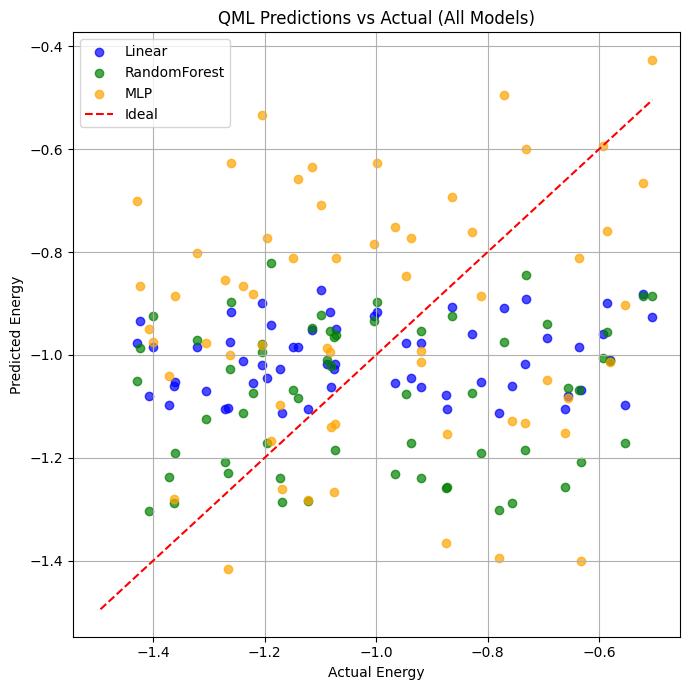

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))

colors = {
    "Linear": "blue",
    "RandomForest": "green",
    "MLP": "orange"
}

for name, res in results.items():
    y_pred = res["y_pred"]
    plt.scatter(y_test, y_pred, alpha=0.7, label=name, color=colors[name])

# 기준선 (예측 = 실제) 추가
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal")

plt.xlabel("Actual Energy")
plt.ylabel("Predicted Energy")
plt.title("QML Predictions vs Actual (All Models)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
